In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import signal
from matplotlib.colors import LogNorm
from datetime import datetime

### IMU Data : sampled at 1 Hz

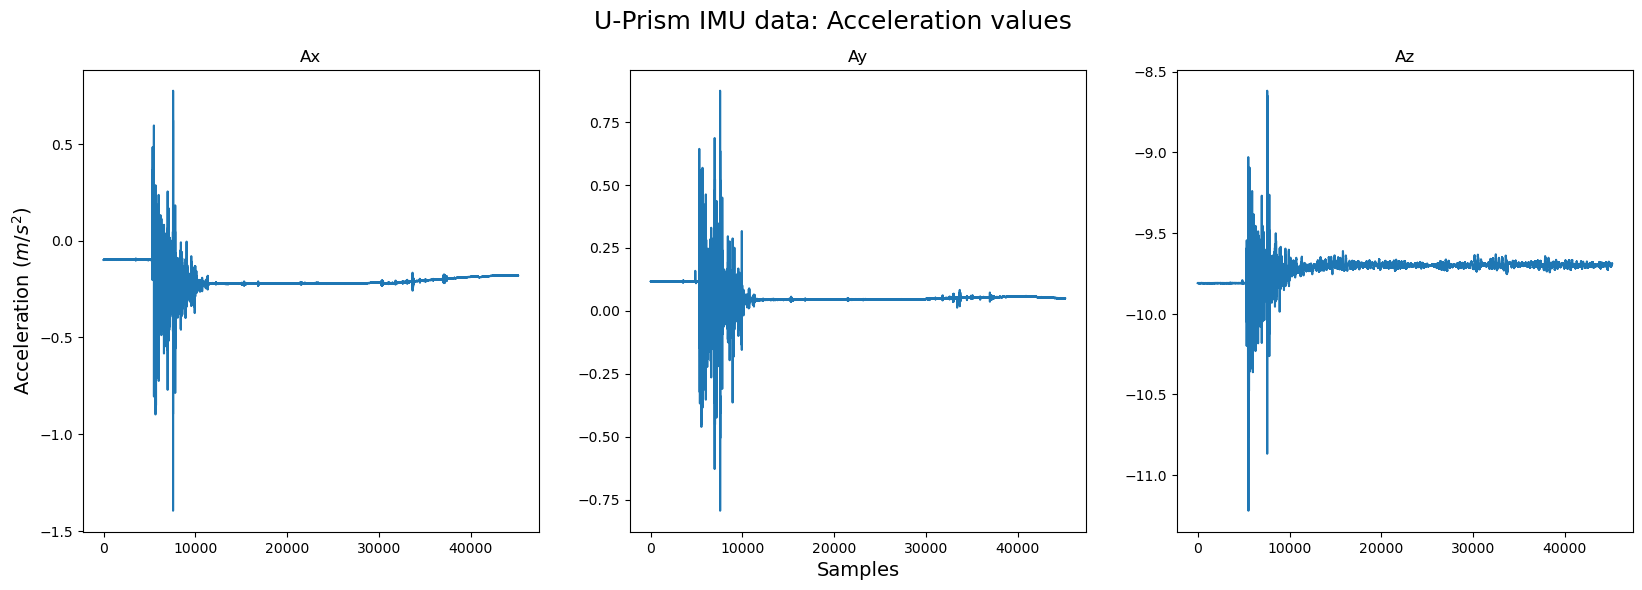

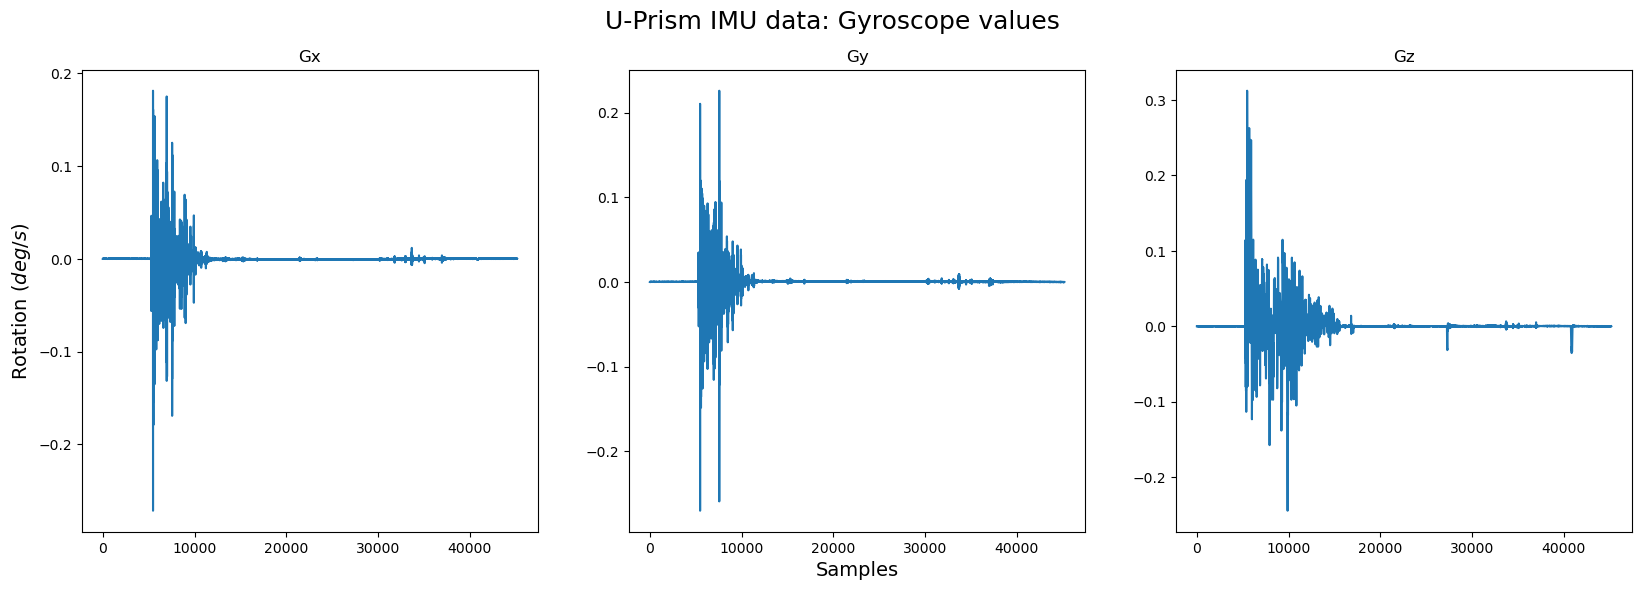

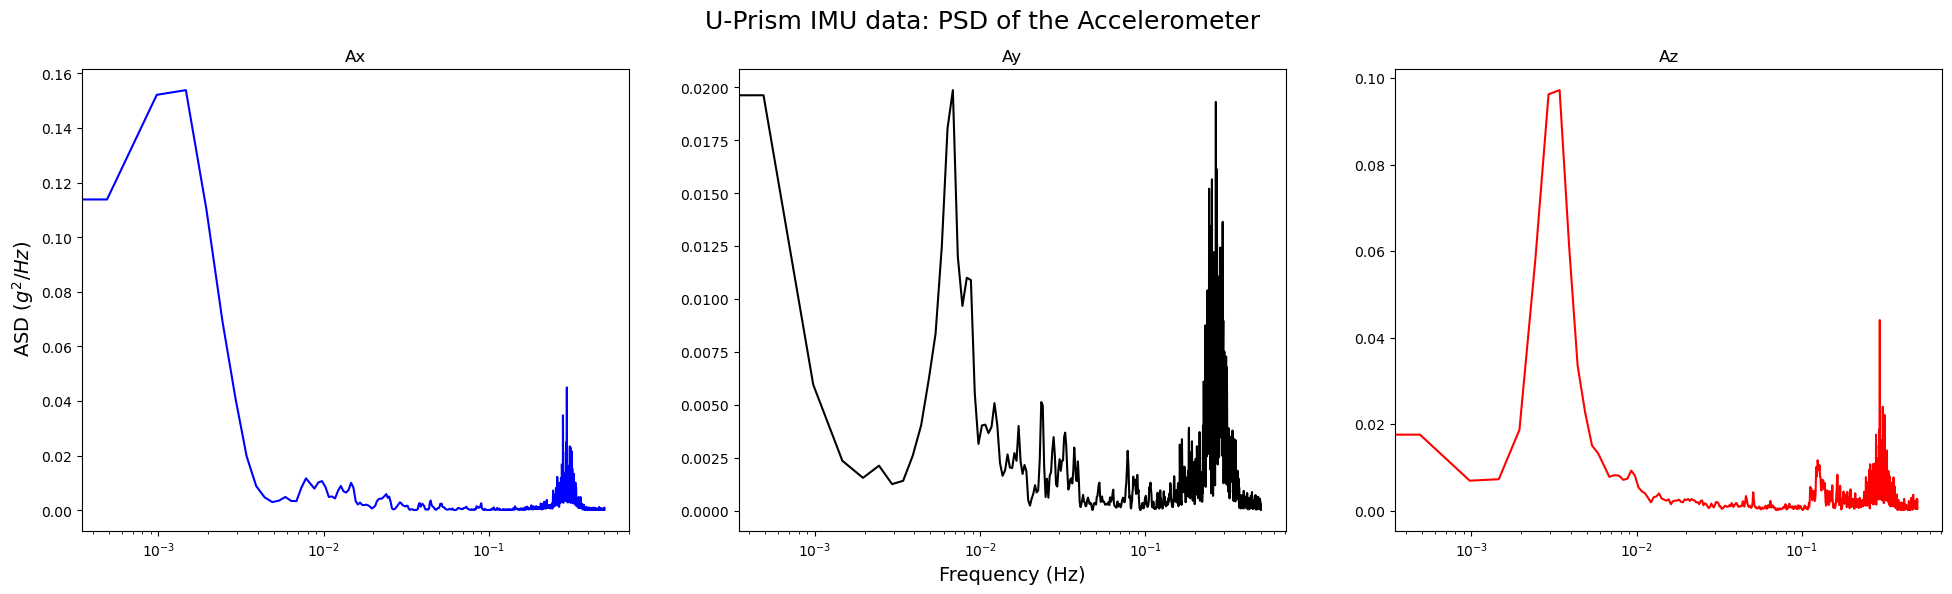

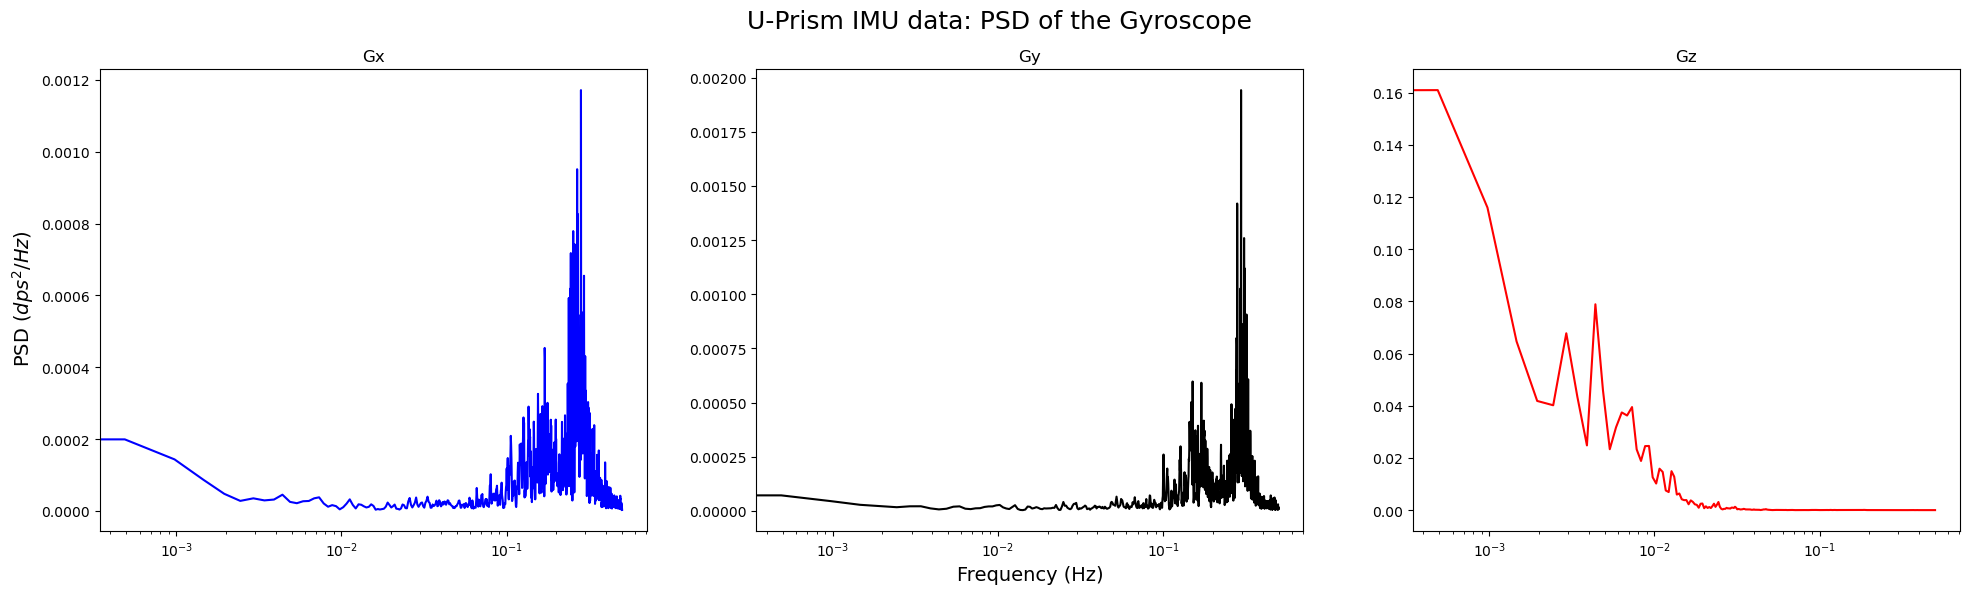

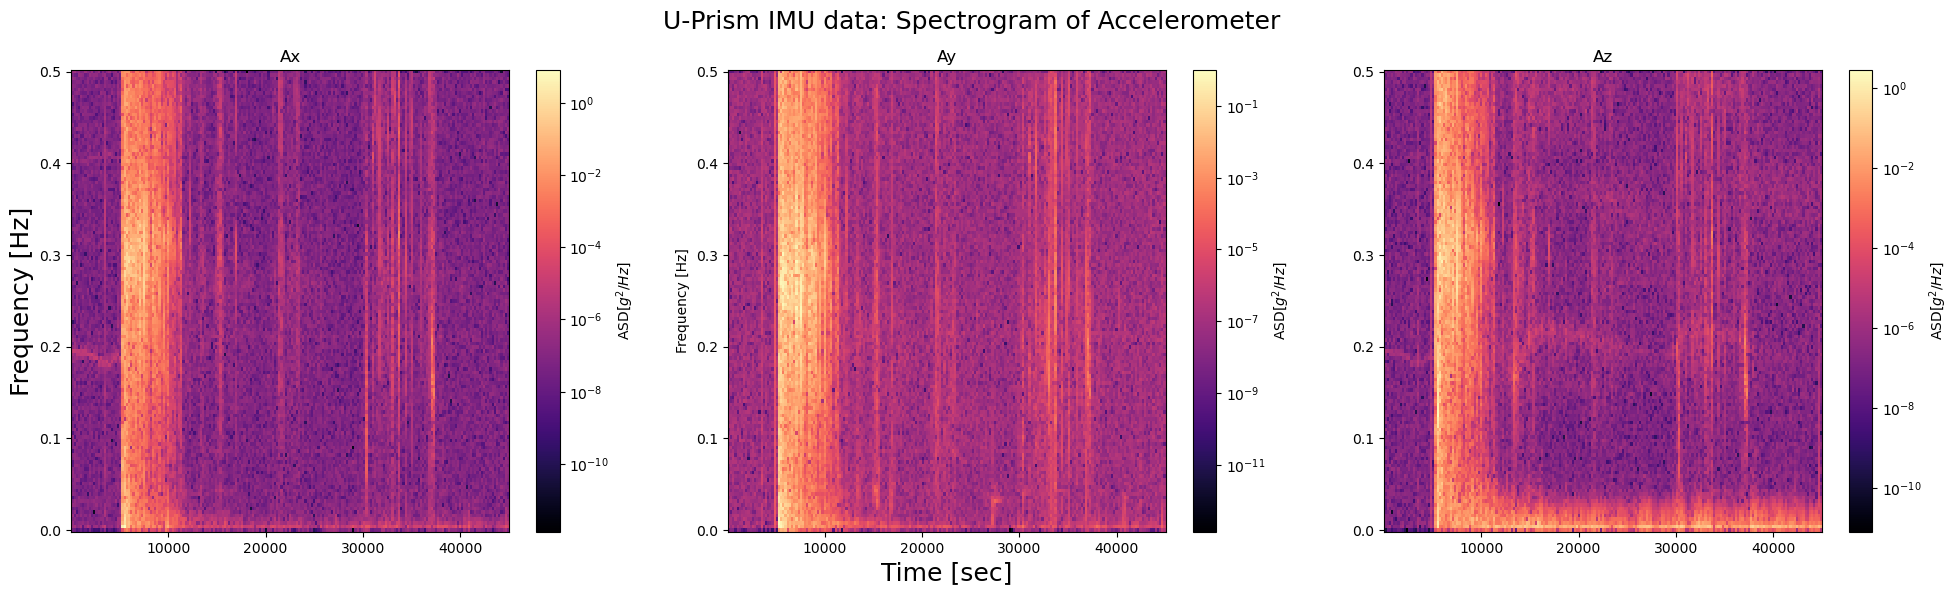

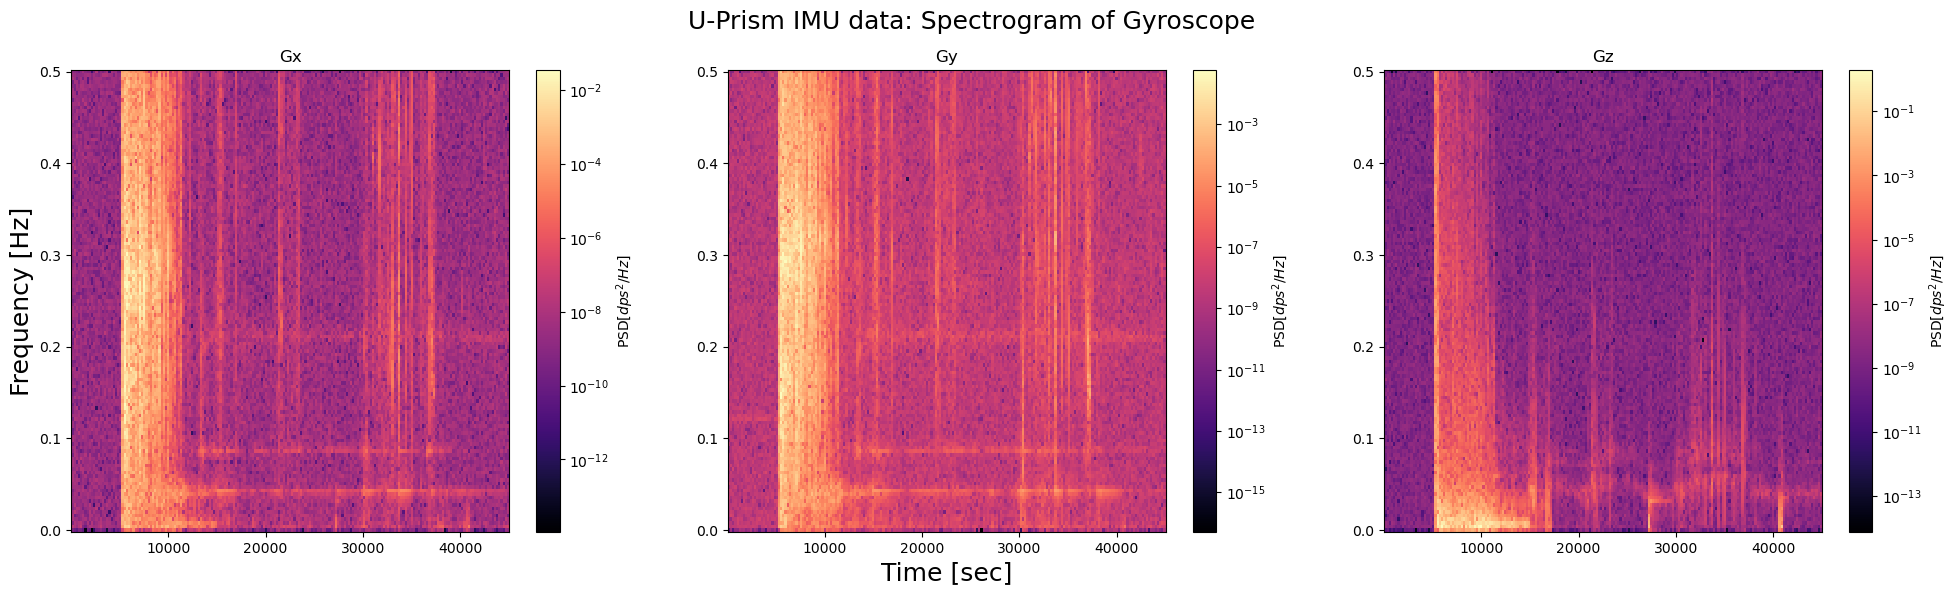

In [128]:
# load data

uprism_imudata = pd.read_csv("GQ7_IMU_20220822_mod.csv")
uprism_imudata.columns = uprism_imudata.columns.str.replace(' ', '_')
t = uprism_imudata.UTC_Timestamp

# extract data

ax = uprism_imudata.Scaled_Accel_X * 9.8 #m/s2
ay = uprism_imudata.Scaled_Accel_Y * 9.8 #m/s2
az = uprism_imudata.Scaled_Accel_Z * 9.8 #m/s2

gx = uprism_imudata.Scaled_Gyro_X  # deg/sec
gy = uprism_imudata.Scaled_Gyro_Y  # deg/sec
gz = uprism_imudata.Scaled_Gyro_Z  # deg/sec

# plot data

fig, axs = plt.subplots(1,3,sharex=True,figsize=(20,6))
fig.suptitle('U-Prism IMU data: Acceleration values',size=18)

axs[0].plot(ax)
axs[0].set_title("Ax")

axs[1].plot(ay)
axs[1].set_title("Ay")

axs[2].plot(az)
axs[2].set_title("Az")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel('Acceleration ($ m/s^2) $',size=14)

plt.savefig("imuaccl.png",dpi="figure")

plt.show()

fig, axs = plt.subplots(1,3,sharex=True,figsize=(20,6))
fig.suptitle('U-Prism IMU data: Gyroscope values',size=18)

axs[0].plot(gx)
axs[0].set_title("Gx")

axs[1].plot(gy)
axs[1].set_title("Gy")

axs[2].plot(gz)
axs[2].set_title("Gz")

axs[1].set_xlabel('Samples',size=14)
axs[0].set_ylabel('Rotation ($ deg/s) $',size=14)

plt.savefig("imugyro.png",dpi="figure")

plt.show()

fs= 1 # Hz
win = 2048

fx,psdax = signal.welch(ax,fs,nperseg=win)
fy,psday = signal.welch(ay,fs,nperseg=win)
fz,psdaz = signal.welch(az,fs,nperseg=win)


fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('U-Prism IMU data: PSD of the Accelerometer',size=18)

axs[0].plot(fx, psdax,color = 'blue')
axs[0].set_title("Ax")

axs[1].plot(fy, psday,color = 'black')
axs[1].set_title("Ay")

axs[2].plot(fz, psdaz,color = 'red')
axs[2].set_title("Az")

axs[1].set_xlabel('Frequency (Hz)',size=14)
axs[0].set_ylabel(r' ASD ($g^2/Hz$) ',size=14)



plt.xscale('log')

plt.savefig("imuasd.png",dpi="figure")
plt.show()

fx,psdgx = signal.welch(gx,fs,nperseg=win)
fy,psdgy = signal.welch(gy,fs,nperseg=win)
fz,psdgz = signal.welch(gz,fs,nperseg=win)


fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('U-Prism IMU data: PSD of the Gyroscope',size=18)

axs[0].plot(fx, psdgx,color = 'blue')
axs[0].set_title("Gx")

axs[1].plot(fy, psdgy,color = 'black')
axs[1].set_title("Gy")

axs[2].plot(fz, psdgz,color = 'red')
axs[2].set_title("Gz")

axs[1].set_xlabel('Frequency (Hz)',size=14)
axs[0].set_ylabel(r' PSD ($dps^2/Hz$) ',size=14)



plt.xscale('log')

plt.savefig("imupsd.png",dpi="figure")
plt.show()

# Plotting spectrogram

fx, t, Sxx = signal.spectrogram(ax, fs)
fy, t, Syy = signal.spectrogram(ay, fs)
fz, t, Szz = signal.spectrogram(az, fs)

fgx, t, Sgx = signal.spectrogram(gx, fs)
fgy, t, Sgy = signal.spectrogram(gy, fs)
fgz, t, Sgz = signal.spectrogram(gz, fs)

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('U-Prism IMU data: Spectrogram of Accelerometer',size=18)


imgax= axs[0].pcolormesh(t, fx, Sxx,norm=LogNorm(),cmap='magma')
axs[0].set_title("Ax")
plt.colorbar(imgax,label=r"ASD[$g^2/Hz$]")

imgay= axs[1].pcolormesh(t, fy, Syy,norm=LogNorm(),cmap='magma')
axs[1].set_title("Ay")
axs[1].set_ylabel('Frequency [Hz]')
plt.colorbar(imgay,label=r"ASD[$g^2/Hz$]")

imgaz= axs[2].pcolormesh(t, fx, Szz,norm=LogNorm(),cmap='magma')
axs[2].set_title("Az")
plt.colorbar(imgaz,label=r"ASD[$g^2/Hz$]")

axs[0].set_ylabel('Frequency [Hz]',size=18)
axs[1].set_xlabel('Time [sec]',size=18)

plt.savefig("imusad.png",dpi="figure")

plt.show()

fig, axs = plt.subplots(1,3,sharex=True,figsize=(24,6))
fig.suptitle('U-Prism IMU data: Spectrogram of Gyroscope',size=18)


imggx= axs[0].pcolormesh(t, fgx, Sgx,norm=LogNorm(),cmap='magma')
axs[0].set_title("Gx")
plt.colorbar(imggx,label=r"PSD[$dps^2/Hz$]")

imggy= axs[1].pcolormesh(t, fgy, Sgy,norm=LogNorm(),cmap='magma')
axs[1].set_title("Gy")
plt.colorbar(imggy,label=r"PSD[$dps^2/Hz$]")

imggz= axs[2].pcolormesh(t, fgz, Sgz,norm=LogNorm(),cmap='magma')
axs[2].set_title("Gz")
plt.colorbar(imggz,label=r"PSD[$dps^2/Hz$]")

axs[0].set_ylabel('Frequency [Hz]',size=18)
axs[1].set_xlabel('Time [sec]',size=18)

plt.savefig("imusgd.png",dpi="figure")

plt.show()

In [17]:
# load temp data 

#without load

tdatanoload = pd.read_csv("testWOLoad.csv")
tdatanoload.columns = tdatanoload.columns.str.replace(' ', '_')

tdataload = pd.read_csv("testWLoad.csv")
tdataload.columns = tdataload.columns.str.replace(' ', '_')



t1nl = tdatanoload.Probe_1
t2nl = tdatanoload.Probe_2
tsnl = tdatanoload.Time

t1l = tdataload.Probe_1
t2l = tdataload.Probe_2
tsl = tdataload.Time

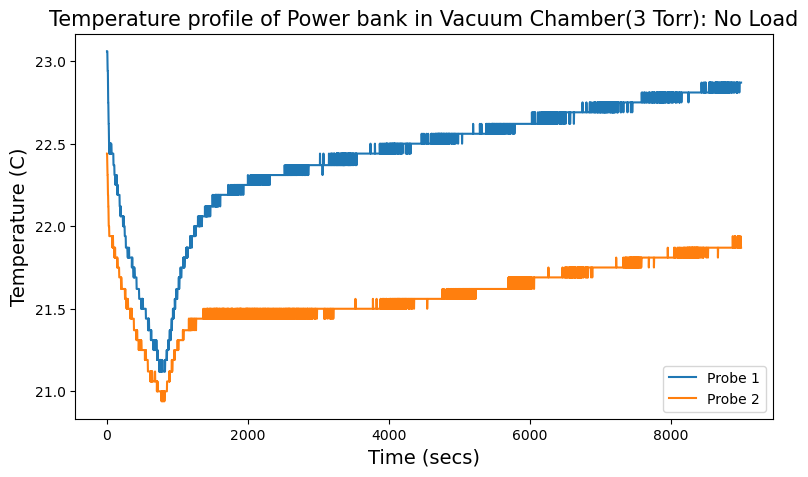

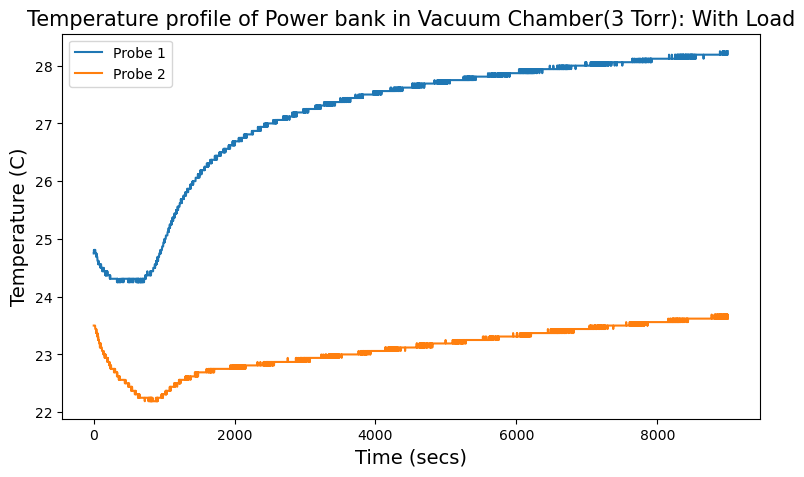

In [28]:
plt.figure(figsize=(9,5))
plt.title("Temperature profile of Power bank in Vacuum Chamber(3 Torr): No Load",size=15)
plt.ylabel("Temperature (C)",size=14)
plt.xlabel("Time (secs)",size=14)
plt.plot(tsnl,t1nl,label="Probe 1")
plt.plot(tsnl,t2nl,label ="Probe 2")
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
plt.title("Temperature profile of Power bank in Vacuum Chamber(3 Torr): With Load",size=15)
plt.ylabel("Temperature (C)",size=14)
plt.xlabel("Time (secs)",size=14)
plt.plot(tsl,t1l,label="Probe 1")
plt.plot(tsl,t2l,label ="Probe 2")
plt.legend()
plt.show()

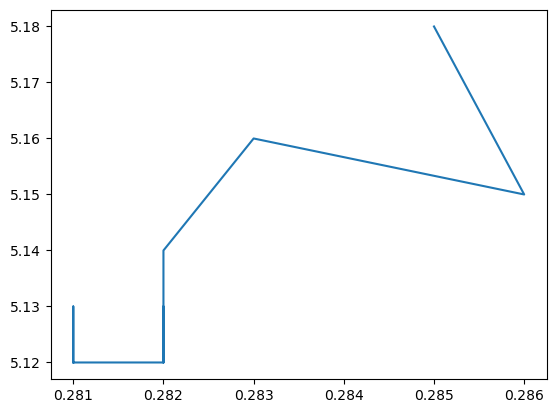

In [46]:
vidata = pd.read_excel("VandI_vacuum_withload.xlsx")

t= np.array(vidata.Time)
v= np.array(vidata.Voltage)
i = vidata.Current

plt.plot(i,v)

In [47]:
v

array([5.18, 5.15, 5.16, 5.14, 5.14, 5.14, 5.13, 5.13, 5.13, 5.12, 5.13,
       5.12, 5.12, 5.12, 5.13, 5.12, 5.12, 5.12, 5.12, 5.12])

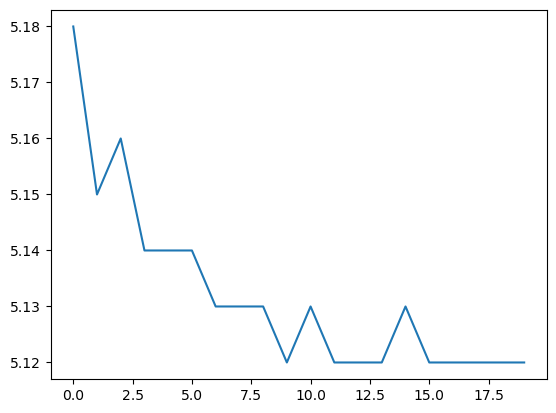

In [48]:
plt.plot(v)